# Libraries and Parameters

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import shap
shap.initjs()

# Pulling the dataset

In [2]:
# Using the "Pima Indians Diabetes Database" dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data?select=diabetes.csv
df = pd.read_csv('diabetes.csv')

In [3]:
#Checking the DF head
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking the shape
df.shape

(768, 9)

In [5]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Describing DF
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Checking NAs
df.isna().sum().head(5)

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

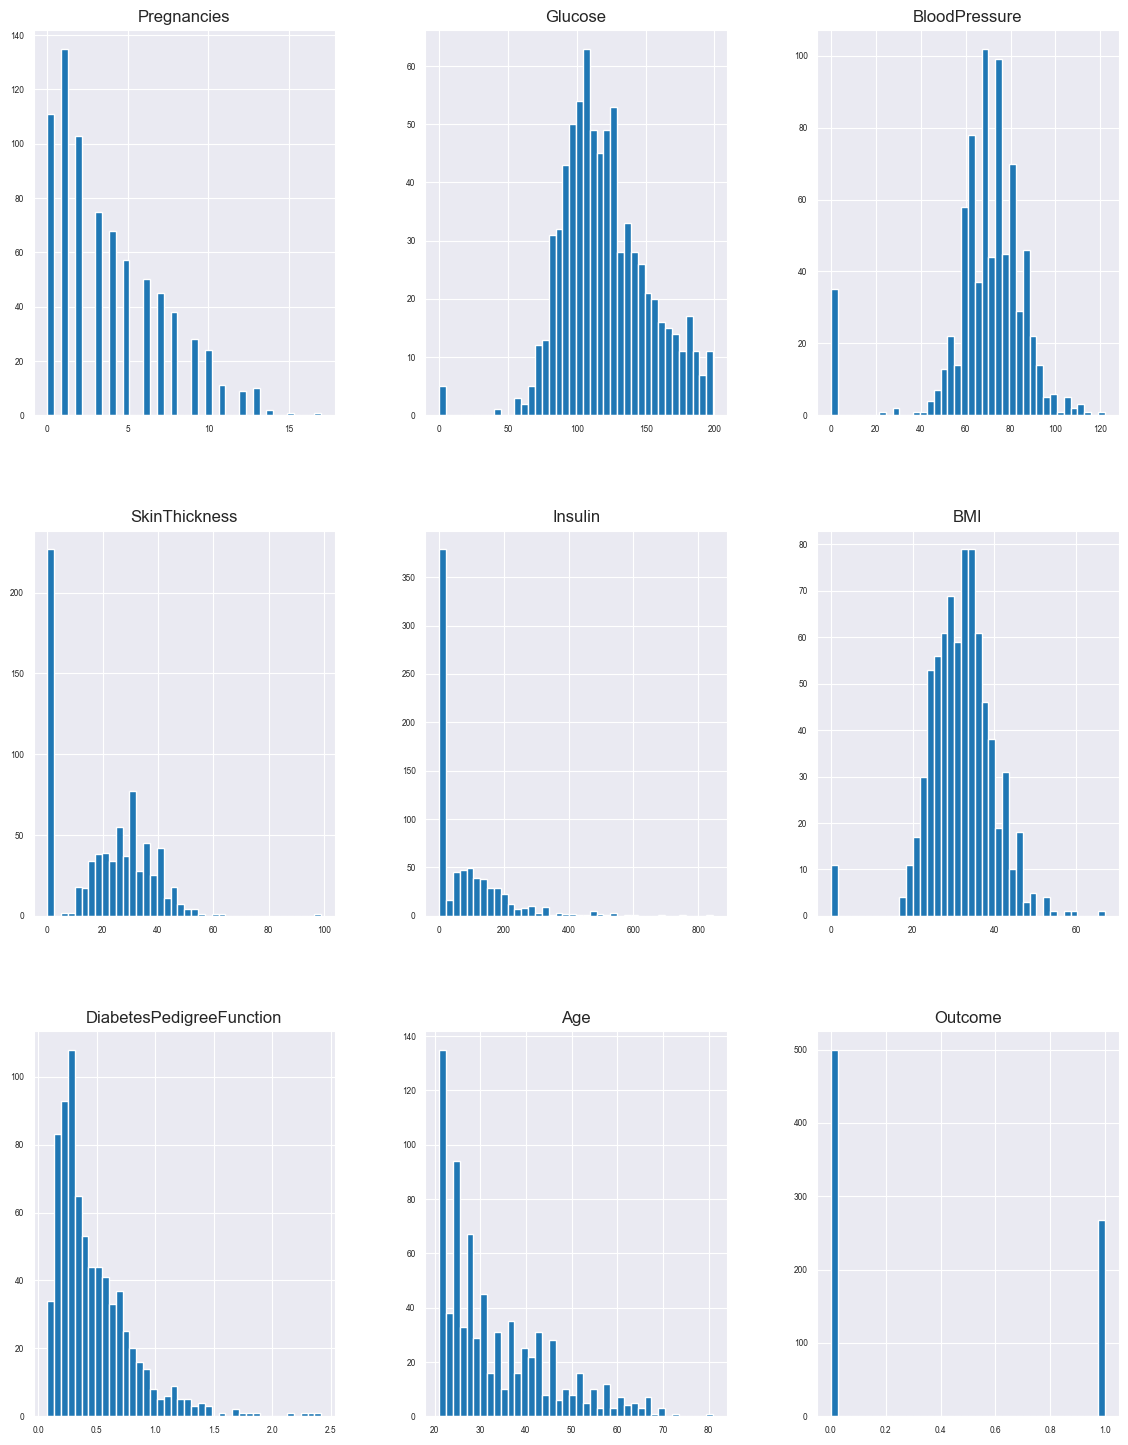

In [8]:
#Distributions
df.hist(figsize=(14, 18), bins=40, xlabelsize=6, ylabelsize=6)

In [9]:
#Note: further EDA steps would include analysis of target balance, outlier removal, multicollinearity removal etc. 
#However, sice the purpose of this notebook is to explore the ANN explainability with SHAP, 
#and considering that it is known that this dataset does not contain outliers / multicollinearity, those steps are omitted.

# Feature preparation and Model Training

In [10]:
#Separating features and targets
X = df.drop(columns='Outcome')
y = df['Outcome']

In [11]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
#Scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Building a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

model.compile(optimizer="adam", 
              loss ="binary_crossentropy", 
              metrics=["accuracy"])

model.fit(X_train, y_train, 
         epochs=100, 
         batch_size=64,
         validation_data=(X_test, y_test)
         )



Epoch 1/100


10/10 [==============================] - 1s 17ms/step - loss: 0.6752 - accuracy: 0.6596 - val_loss: 0.6744 - val_accuracy: 0.6494
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.6596 - val_loss: 0.6684 - val_accuracy: 0.6558
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6627 - accuracy: 0.6564 - val_loss: 0.6638 - val_accuracy: 0.6494
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.6547 - val_loss: 0.6605 - val_accuracy: 0.6494
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6547 - accuracy: 0.6531 - val_loss: 0.6577 - val_accuracy: 0.6494
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6531 - val_loss: 0.6557 - val_accuracy: 0.6494
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6492 - accuracy: 0.6531 - val_loss: 0.6533 - val_accuracy: 0.6494
Epoch 8/

Epoch 53/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4874 - accuracy: 0.7622 - val_loss: 0.5233 - val_accuracy: 0.7078
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4847 - accuracy: 0.7622 - val_loss: 0.5200 - val_accuracy: 0.7078
Epoch 55/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4839 - accuracy: 0.7704 - val_loss: 0.5191 - val_accuracy: 0.7078
Epoch 56/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4838 - accuracy: 0.7785 - val_loss: 0.5167 - val_accuracy: 0.7078
Epoch 57/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4781 - accuracy: 0.7818 - val_loss: 0.5160 - val_accuracy: 0.7078
Epoch 58/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.7752 - val_loss: 0.5155 - val_accuracy: 0.7013
Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4750 - accuracy: 0.7769 - val_loss: 0.5152 - val_accuracy: 0.7013
Epoch 

In [14]:
#Predicting test
predictions = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [15]:
#Checking F1, precision, recall
print(classification_report(y_test, (predictions > 0.5).astype("int32")))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



# Explaining the impact of features with SHAP

In [16]:
#Reformatting X_train and X_test from numpy arrays to pandas dataframes
X_train = pd.DataFrame(data=X_train, columns = df.drop(columns='Outcome').columns)
X_test = pd.DataFrame(data=X_test, columns = df.drop(columns='Outcome').columns)

In [61]:
#Sampling 100 records at random to push through the explainer
#Using all records is quite expensive computationally. Sampling allows us to approximately explain the overall model without using all records.
explainer = shap.KernelExplainer(model.predict, X_train.sample(100))

4/4 [==============================] - 0s 1ms/step


794/794 [==============================] - 1s 760us/step


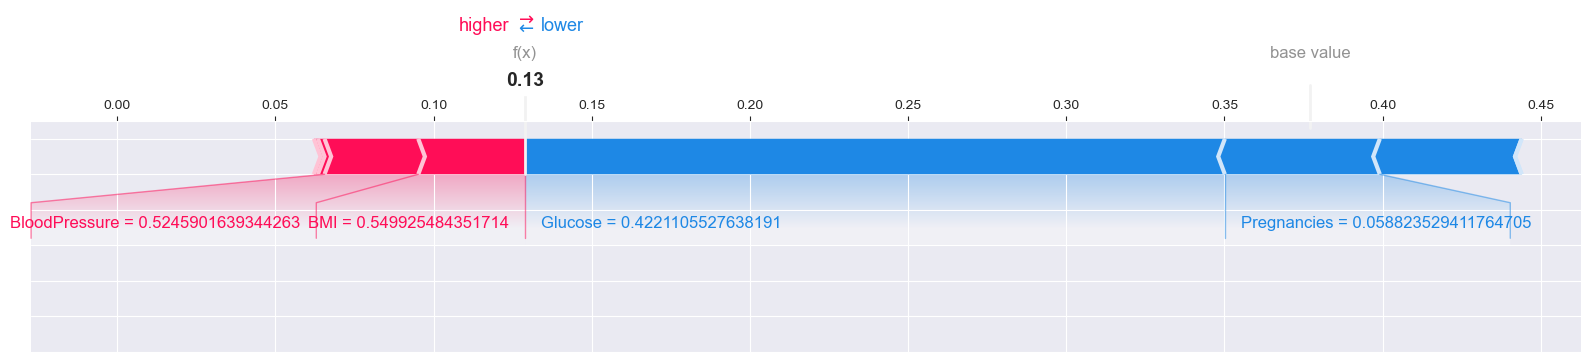

In [23]:
#Explaining a selected single prediction using 500 samples
shap_values = explainer.shap_values(X_test.iloc[31,:], nsamples=500)

#Force plot
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[31,:], matplotlib=True)

#Features pushing pred higher are red, lower are blue.
#Base value is ~0.38 (38% prob)
#The wider the stripe, the larger is the contribution of the feature.
#Sum of contributions pushes the prediction from the base value to the predicted value.

#For this record, BloodPressure and BMI have positive contribution, but are outweighed by Glucose and Pregnancies 
#that push the prediction down from the base value (~39%) to 13%:

In [43]:
#Multiple pred explanation
shap_values_multi = explainer.shap_values(X_test, nsamples=100)

  0%|          | 0/154 [00:00<?, ?it/s]

313/313 [==============================] - 0s 744us/step


313/313 [==============================] - 0s 791us/step


313/313 [==============================] - 0s 764us/step


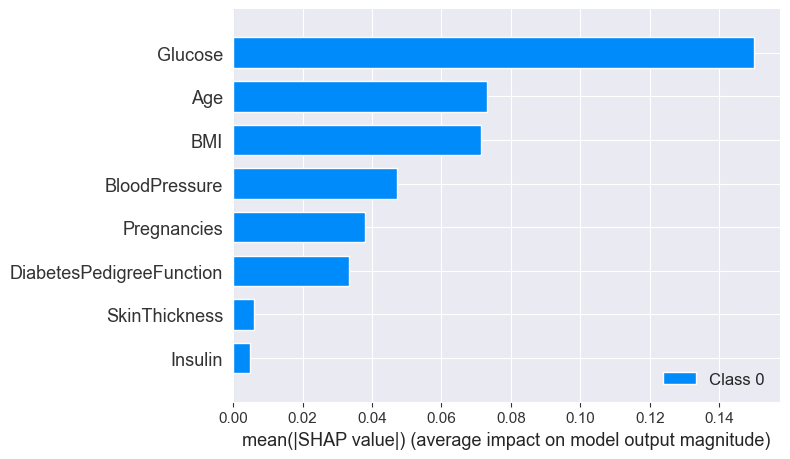

In [49]:
#Summary plot
shap.summary_plot(shap_values_multi, X_test)
#Overall, Glucose level has the highest contribution towards model's predictions:

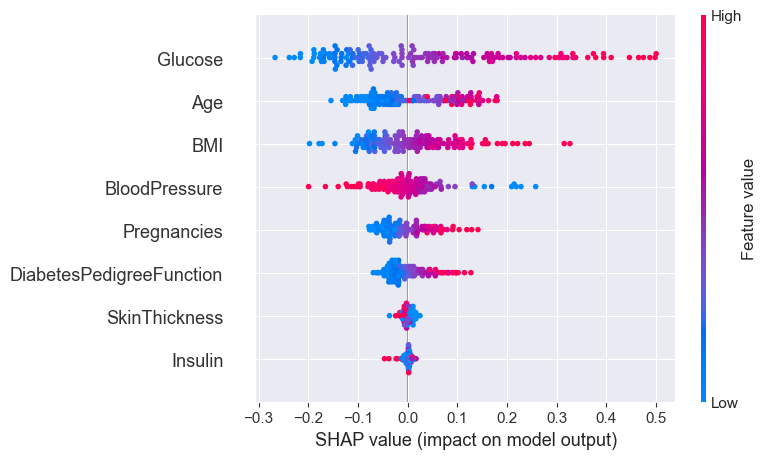

In [68]:
#Summary plot 2
shap.summary_plot(shap_values_multi[0], X_test)

#X axis represents the impact of the feature, colors are high (red) and low (blue) in terms of impact on the value

#We can see that Glucose seems to impact the prediction in both directions (high & low), depending on it's value.

In [69]:
#Previous force plot was providing explanations for a single person
#Now let's have a look at explanations for the entire dataset
shap.force_plot(explainer.expected_value, shap_values_multi[0], X_test)

#Below plot depicts the change in predictions (Y axis) based on feature values
# (howering over the plot shows contributions of features for that particular person's prediction):